Bilgisayar Mühendisliği <br>
Eda İpek Sanlı 20040101006 

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [67]:
#Dosyayı okur ve data frame'e çevirir
#delimiter sütunları ayıran karakteri belirtirken, header veri setinin başlık satırı olmadığını belirtir.
df = pd.read_csv('Pima Indians Diabetes.txt', header=None, delimiter='\t')
column_names = ['Pregnencies', 'Glucose', 'BloodPressure','SkinThickness','SerumInsulin','BMI','DiabetesPedigreeFunction','Age','Output'] 

df.columns = column_names

df.head(10)

,Pregnencies,Glucose,BloodPressure,SkinThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age,Output
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [68]:
row,col=df.shape
print('Number of rows:',row)
print('Number of columns:',col)

Number of rows: 768
Number of columns: 9


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnencies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   SerumInsulin              768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Output                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnencies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
SerumInsulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Output,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [71]:
#Eksik verinin var olup olmadığını kontrol eder
df.isnull().sum()

Pregnencies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
SerumInsulin                0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Output                      0
dtype: int64

In [72]:
X = df.drop('Output',axis=1)
y = df['Output']        

sc = StandardScaler()
X_normalized = sc.fit_transform(X)

print("Normalleştirilmiş Veri:")
print(X_normalized)


Normalleştirilmiş Veri:
[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [73]:
#PCA Uygulaması
pca = PCA(n_components=2)  # İki en yüksek öz değeri almak için
X_pca = pca.fit_transform(X_normalized)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA_Component1', 'PCA_Component2'])
pca_df = pd.concat([pca_df, df['Output']], axis=1)

print("PCA'nın oluşturduğu iki ana bileşen: ")
print(pca.components_)

# En önemli iki öznitelik için isimleri bulma
most_important = [np.abs(pca.components_[i]).argmax() for i in range(len(pca.components_))]
most_important_names = [df.columns[most_important[i]] for i in range(len(pca.components_))]

print("En önemli iki öznitelik: ", most_important_names)

pca_df


PCA'nın oluşturduğu iki ana bileşen: 
[[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]]
En önemli iki öznitelik:  ['BMI', 'Age']


,PCA_Component1,PCA_Component2,Output
0,1.068503,1.234895,1
1,-1.121683,-0.733852,0
2,-0.396477,1.595876,1
3,-1.115781,-1.271241,0
4,2.359334,-2.184819,1
...,...,...,...
763,1.562085,1.923150,0
764,-0.100405,-0.614181,0
765,-0.283475,0.097065,0
766,-1.060324,0.837062,1


In [74]:
#LDA uygulaması
y= df['Output']
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_normalized, y)

print("LDA sonuçları: ", X_lda)

most_important_index = np.argmax(np.abs(lda.coef_))

# En önemli öznitelik için ismi bulma
most_important_name = df.columns[most_important_index]

print("En önemli öznitelik: ", most_important_name)

LDA sonuçları:  [[ 1.38024702e+00]
 [-1.56452399e+00]
 [ 1.76618515e+00]
 [-1.69058752e+00]
 [ 2.20726804e+00]
 [-6.30945011e-01]
 [-1.32918043e+00]
 [ 1.12663761e+00]
 [ 1.44250389e+00]
 [-1.57821647e+00]
 [-3.60325075e-01]
 [ 2.26355831e+00]
 [ 1.64069266e+00]
 [ 1.18282272e+00]
 [ 1.13107071e+00]
 [ 3.91039109e-01]
 [ 1.57575445e-01]
 [-3.97093569e-01]
 [ 1.61251574e-01]
 [-2.61372162e-01]
 [ 2.66682978e-01]
 [ 4.16996885e-02]
 [ 2.70210532e+00]
 [ 2.12661643e-02]
 [ 1.30195146e+00]
 [ 5.13605683e-01]
 [ 1.39813224e+00]
 [-1.58728261e+00]
 [ 8.87292345e-01]
 [-9.52716561e-02]
 [ 4.05704236e-01]
 [ 8.91805731e-01]
 [-1.54050347e+00]
 [-1.75281602e+00]
 [ 4.88314327e-01]
 [-6.08892962e-01]
 [ 1.17022015e+00]
 [ 3.14805714e-01]
 [-5.93317579e-01]
 [ 8.27209068e-01]
 [ 1.48104538e+00]
 [ 1.20652541e+00]
 [-8.28902575e-01]
 [ 2.49660978e+00]
 [ 1.11406406e+00]
 [ 2.80528167e+00]
 [ 4.73716130e-01]
 [-1.75769819e+00]
 [ 2.36455873e-01]
 [-1.50086415e+00]
 [-1.75598565e+00]
 [-1.08934077e+

In [75]:
#Ana veri setine Çoklu Doğrusal Regresyon ve Multinominal Lojistik Regresyon modeli
X = df.drop(columns=['Output'])
y = df['Output']

# Veri setini eğitim ve test alt kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modeli
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_coefficients = linear_reg_model.coef_

# Multinominal Lojistik Regresyon modeli
logistic_reg_model = LogisticRegression(max_iter=1000)
logistic_reg_model.fit(X_train, y_train)
logistic_reg_coefficients = logistic_reg_model.coef_

# Katsayıları raporlama
print("Çoklu Doğrusal Regresyon katsayıları:")
print(linear_reg_coefficients)
print("\nMultinominal Lojistik Regresyon katsayıları:")
print(logistic_reg_coefficients)

linear_reg_predictions = linear_reg_model.predict(X_test)
logistic_reg_predictions = logistic_reg_model.predict(X_test)

Çoklu Doğrusal Regresyon katsayıları:
[ 0.00899394  0.00574161 -0.00171114 -0.00025321 -0.0001265   0.01617347
  0.07290169  0.0062645 ]

Multinominal Lojistik Regresyon katsayıları:
[[ 0.0577509   0.03590632 -0.01087037 -0.00140237 -0.00098556  0.10910568
   0.37409764  0.0360156 ]]


In [76]:
#PCA verilerine göre Çoklu Doğrusal Regresyon ve Multinominal Lojistik Regresyon modeli
X = pca_df.drop(columns=['Output'])
y = pca_df['Output']

# Veri setini eğitim ve test alt kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modeli
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_coefficients = linear_reg_model.coef_

# Multinominal Lojistik Regresyon modeli
logistic_reg_model = LogisticRegression(max_iter=1000)
logistic_reg_model.fit(X_train, y_train)
logistic_reg_coefficients = logistic_reg_model.coef_

# Katsayıları raporlama
print("Çoklu Doğrusal Regresyon katsayıları:")
print(linear_reg_coefficients)
print("\nMultinominal Lojistik Regresyon katsayıları:")
print(logistic_reg_coefficients)

linear_reg_predictions = linear_reg_model.predict(X_test)
logistic_reg_predictions = logistic_reg_model.predict(X_test)

Çoklu Doğrusal Regresyon katsayıları:
[0.13965659 0.07903115]

Multinominal Lojistik Regresyon katsayıları:
[[0.76804592 0.40598983]]


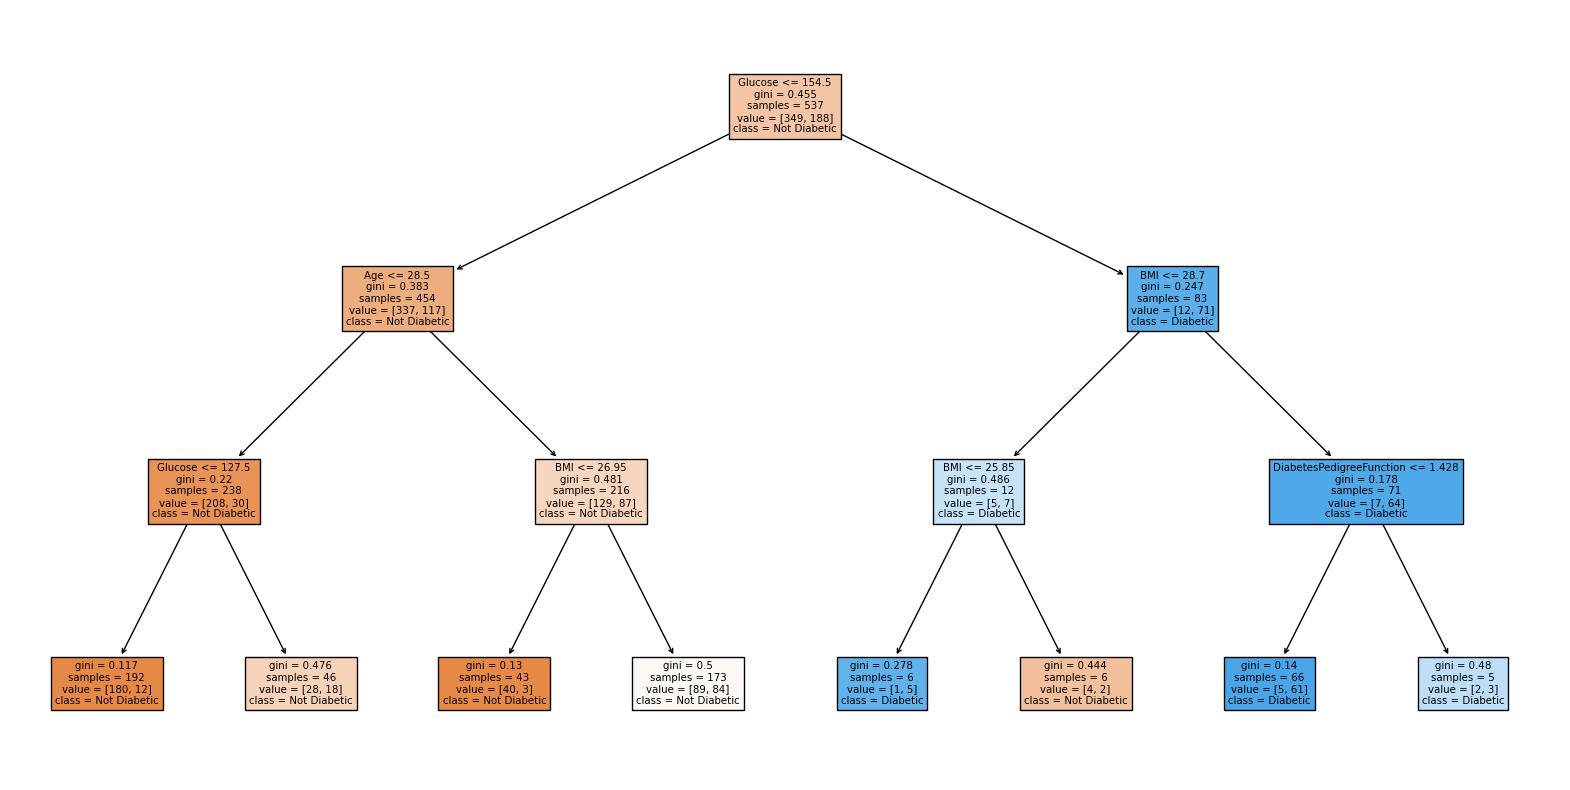

In [77]:
#Ana veri seti için Decision Tree Classifier
from sklearn.tree import plot_tree

X = df.drop(columns=['Output'])
y = df['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar ağacı sınıflandırıcısını eğitme
classifier = DecisionTreeClassifier(criterion='gini', random_state=42,max_depth=3, min_samples_leaf=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True, feature_names=list(X.columns), class_names=['Not Diabetic', 'Diabetic'])
plt.show()

In [78]:
#PCA uygulanmış veri için Decision Tree Classifier
X = pca_df.drop(columns=['Output'])
y = pca_df['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar ağacı sınıflandırıcısını eğitme
classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = classifier.predict(X_test)

# Performans metriklerini hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Confusion Matrix: ", conf_matrix)
print(f"Class report", class_report)

Confusion Matrix:  [[100  51]
 [ 38  42]]
Class report               precision    recall  f1-score   support

           0       0.72      0.66      0.69       151
           1       0.45      0.53      0.49        80

    accuracy                           0.61       231
   macro avg       0.59      0.59      0.59       231
weighted avg       0.63      0.61      0.62       231



In [79]:
#Ana veri seti için Naive Bayes metodu
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix

X = df.drop(columns=['Output'])
y = df['Output']
# Veri setini %70 eğitim ve %30 test olacak şekilde ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını uygulama
nb = GaussianNB()
nb.fit(X_train, y_train)

# Eğitim seti için tahminler yapma
y_train_pred = nb.predict(X_train)

# Test seti için tahminler yapma
y_test_pred = nb.predict(X_test)

# Performans metriklerini hesaplama
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp /( tp + fn)

conf_matx = confusion_matrix(y_test,y_test_pred)
# Sonuçları yazdırma
print(f"Test accuracy: {test_accuracy}")
print(f"F1 Score: {test_f1}")
print(f"Specifitiy: {specificity}")
print(f"Sensitivity: {sensitivity}")
print(f"Conf matrix: {conf_matx}")


Test accuracy: 0.7445887445887446
F1 Score: 0.6424242424242423
Specifitiy: 0.7880794701986755
Sensitivity: 0.6625
Conf matrix: [[119  32]
 [ 27  53]]


In [80]:
#PCA uygulanmış transformasyon öznitelik matrisi için Naive Bayes metodu
X_pca_x= pca_df.drop('Output',axis=1)
y_pca= pca_df['Output']

X_train, X_test, y_train, y_test = train_test_split(X_pca_x, y_pca, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını uygulama
nb = GaussianNB()
nb.fit(X_train, y_train)

# Eğitim seti için tahminler yapma
y_train_pred = nb.predict(X_train)

# Test seti için tahminler yapma
y_test_pred = nb.predict(X_test)

# Performans metriklerini hesaplama
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp /( tp + fn)

conf_matx = confusion_matrix(y_test,y_test_pred)
# Sonuçları yazdırma
print(f"Test accuracy: {test_accuracy}")
print(f"F1 Score: {test_f1}")
print(f"Specifitiy: {specificity}")
print(f"Sensitivity: {sensitivity}")
print(f"Conf matrix: {conf_matx}")


Test accuracy: 0.70995670995671
F1 Score: 0.5314685314685315
Specifitiy: 0.8344370860927153
Sensitivity: 0.475
Conf matrix: [[126  25]
 [ 42  38]]
